In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import metrics


In [9]:
def bagging_ensemble(X_train, y_train, X_test, y_test, n_clf = 10):
    '''
    Returns accuracy on the test set X_test with corresponding labels y_test
    using a bagging ensemble classifier with n_clf decision trees trained with 
    training examples X_train and training labels y_train.
    Input:
        X_train- (n_train, d) array of training feature vectors, where n_train 
            is # of examples and d is # of features
        y_train- (n_train, ) array of labels corresponding to X_train
        X_test- (n_test, d) array of testing feature vectors, where n_test is 
            # of examples and d is # of features
        y_test- (n_test, ) array of labels corresponding to X_test
        n_clf- # of decision tree classifiers in the bagging ensemble, default
            value of n_clf is 10
    Output:
        Accuracy of the bagging ensemble classifier on X_test
    '''
    
    # ---------- TODO make your implementation here---------------

    # Predictions of n_clf decision trees
    trees = []

    # train n_clf decision trees
    for _ in range(n_clf):

        # Constructing a Bootstrap sample of training data
        n_samples = X_train.shape[0]
        idx = np.random.choice(n_samples, n_samples, replace=True)
        X, y = X_train[idx], y_train[idx] 
    
        # Train each decision tree with Bootstraped Dataset
        model = DecisionTreeClassifier()
        model.fit(X, y)

        # Storing predictions of each decision tree
        trees.append(model.predict(X_test))

    # Making final predictions of bagging classifier by getting majority votes of n_clf Decision trees
    y_pred = majority_vote(trees)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return accuracy
    # -------------------------------------------------------

In [10]:
def random_forest(X_train, y_train, X_test, y_test, m, n_clf = 10):
    '''
    Returns accuracy on the test set X_test with corresponding labels y_test
    using a random forest classifier with n_clf decision trees trained with 
    training examples X_train and training labels y_train.
    Input:
        X_train- (n_train, d) array of training feature vectors, where n_train 
            is # of examples and d is # of features
        y_train- (n_train, ) array of labels corresponding to X_train
        X_test- (n_test, d) array of testing feature vectors, where n_test is 
            # of examples and d is # of features
        y_test- (n_test, ) array of labels corresponding to X_test
        n_clf- # decision tree classifiers in the random forest, default
            value of n_clf is 10
    Output:
        Accuracy of the random forest classifier on X_test
    '''

    # ---------- TODO make your implementation here---------------
    
    trees = []
    for _ in range(n_clf):

        n_samples = X_train.shape[0]
        idx = np.random.choice(n_samples, n_samples, replace=True)
        X, y = X_train[idx], y_train[idx] 
    
        # Train each decision tree with Bootstraped Dataset by using m features as the split
        model = DecisionTreeClassifier(max_features=m)
        model.fit(X, y)
        trees.append(model.predict(X_test))

    y_pred = majority_vote(trees)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return accuracy
    # -------------------------------------------------------

In [11]:
def majority_vote(pred_list):
    '''
    Given a list of m (n, ) arrays, each (n, ) array containing the predictions for 
    same set of n examples (using different classifiers), return a (n, ) array 
    containing majority vote prediction of the m (n, ) arrays
    Input:
        pred_list- a list of m (n, ) arays
    Output:
        y_pred- (n, ) array containing majority vote prediction using pred_list
    ''' 
    # ---------- TODO make your implementation here---------------

    # pred_list consists of predictions of n_clf classifiers on X_test
    # ex: pred_list = [ [0, 3 ...], [1, 2, ...], ...]
    # for each row or example, the final prediction will be the class that has maximum votes by n_clf classifiers
    y_pred = np.apply_along_axis(lambda x:np.argmax(np.bincount(x)), axis=0, arr=pred_list)

    return y_pred
    # -------------------------------------------------------


In [14]:
def plot_histograms(random_forest_scores, bagging_scores):
    '''
    Plots histogram of values in random_forest_scores and bagging_scores
    overlayed on top of each other
    Input:
        random_forest_scores- a list containing accuracy values for random forest classifier 
        for 100 different train and test set splits
        bagging_scores- a list containing accuracy values for bagging ensemble classifier 
        using decision trees for the same 100 different train and test set splits
        as random_forest_scores
    '''
    bins = np.linspace(0.8, 1.0, 100)
    plt.figure()
    plt.hist(random_forest_scores, bins, alpha=0.5, label='random forest')
    plt.hist(bagging_scores, bins, alpha=0.5, label='bagging')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.show()

#plot_histograms(random_forest_scores, bagging_scores)

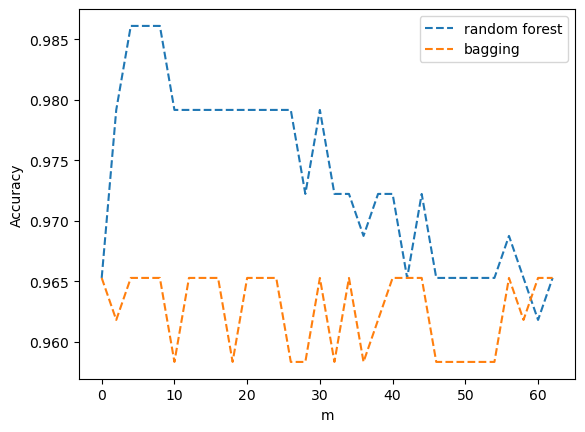

In [12]:
# Load digits dataset
digits = load_digits(n_class = 4)
X, y = digits.data, digits.target

# Calculate accuracy of bagging ensemble and random forest for 100 random train/test splits
# Analyze how the performance of bagging & random forest changes with m
results1, results2 = [], []
for j in range(0, 64, 2):
    #print(j) 32 loops
    bagging_scores, random_forest_scores = [], [] #100 accuracy scores each iteration
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        random_forest_scores.append(random_forest(X_train, y_train, X_test, y_test, j+1))
        bagging_scores.append(bagging_ensemble(X_train, y_train, X_test, y_test))
    results1.append(np.median(np.array(random_forest_scores)))
    results2.append(np.median(np.array(bagging_scores)))

plt.figure()
plt.plot(range(0, 64, 2), results1, '--', label = 'random forest')
plt.plot(range(0, 64, 2), results2, '--', label = 'bagging')
plt.xlabel('m')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()
